To simulate an Open Quantum System where the cavity loses photons to the environment.

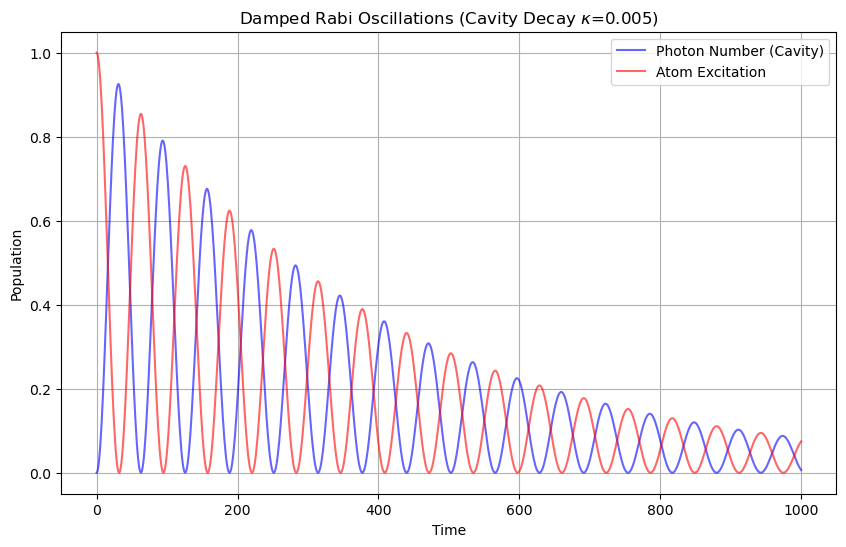

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Hamiltonian 
def build_jc_hamiltonian(N, w_c, w_a, g):
    a  = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), sigmam())
    sz = tensor(qeye(N), sigmaz())
    
    H = (w_c * a.dag() * a) + (0.5 * w_a * sz) + (g * (a.dag() * sm + a * sm.dag()))
    return H, a

# Parameters 
N = 15
w = 1.0
g = 0.05
kappa = 0.005  # Decay rate (10x slower than coupling g)

# Build System
H, a = build_jc_hamiltonian(N, w, w, g)

# Collapse Operators
# This is the leak in the cavity
c_ops = [np.sqrt(kappa) * a]

# Initial State
# Atom Excited, Cavity Empty
psi0 = tensor(basis(N, 0), basis(2, 0))

# Time Evolution
# Run for a longer time to see the decay
tlist = np.linspace(0, 1000, 1000)

# Observables: Photon Number and Atom Excitation
n_op = a.dag() * a
atom_op = tensor(qeye(N), basis(2,0)*basis(2,0).dag())

# We now pass 'c_ops' into mesolve
output = mesolve(H, psi0, tlist, c_ops, [n_op, atom_op])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(tlist, output.expect[0], label="Photon Number (Cavity)", color="b", alpha=0.6)
ax.plot(tlist, output.expect[1], label="Atom Excitation", color="r", alpha=0.6)

ax.set_xlabel("Time")
ax.set_ylabel("Population")
ax.set_title(f"Damped Rabi Oscillations (Cavity Decay $\kappa$={kappa})")
ax.legend()
ax.grid(True)

plt.show()